# Circuitos

![Circuito em série](./img/serie.png)

![Circuito em paralelo](./img/paralelo.png)

# Simulações

In [107]:
# Vamos importar os módulos que precisamos
from cmath import *
import math
from numpy import linalg
import numpy as np
import matplotlib.pyplot as plt

In [132]:
# Declarando variáveis 

R1 = R2 = Rdc = 0.5
Rc= 5

L1 = L2 = L = 196e-6

C1 = C2 = 0.1e-6

Ufonte = 12

PossiveisK = np.linspace(0.1,1,10)
kFixo = 0.2

PossiveisFreq = np.arange(1e-3,100e3,500)
freqFixo = 36000

In [133]:
# Função que calcula o transformador em paralelo
def calculaTransformadorParalelo(k, f):

    # Indutância aproximada das bobinas
    w = 2*math.pi*f
    M = k*sqrt(L1*L2)

    # Reatâncias
    XM = 1j*w*M
    XC1 = 1/(w*C1*1j)
    XC2 = 1/(w*C2*1j)
    XL1 = 1j*w*L1
    XL2 = 1j*w*L2
    
    # Reatância equivalente
    Xeq = (Rc*XC2 / (Rc+XC2))
    
    Z=np.array([[R1+XL1+XC1, -XM],[-XM, Xeq+R2+XL2]])
    V=np.array([Ufonte,0])
    i=np.dot(linalg.inv(Z),V)

    # Corrente no primário e secundário
    i1 =  i[0]
    i2 =  i[1]
    
    # DDP e corrente na carga
    V2 = Xeq*i2
    ic = V2/Rc
    
    return i1, i2, ic, V2

In [134]:
# Função que calcula o transformador em série
def calculaTransformadorSerie(k, f):

    # Indutância aproximada das bobinas
    w = 2*math.pi*f
    M = k*sqrt(L1*L2)

    # Reatâncias
    XM = 1j*w*M
    XC1 = 1/(w*C1*1j)
    XC2 = 1/(w*C2*1j)
    XL1 = 1j*w*L1
    XL2 = 1j*w*L2
    
    # Reatância equivalente
    Xeq = Rc+XC2
    
    Z=np.array([[R1+XL1+XC1, -XM],[-XM, Xeq+R2+XL2]])
    V=np.array([Ufonte,0])
    i=np.dot(linalg.inv(Z),V)

    # Corrente no primário e secundário
    i1 =  i[0]
    i2 =  i[1]
    
    # DDP e corrente na carga
    V2 = Xeq*i2
    ic = V2/Rc
    
    return i1, i2, ic, V2

In [135]:
def calculaR(f):
    R = Rdc + (Rdc/100e3) * f
    return R

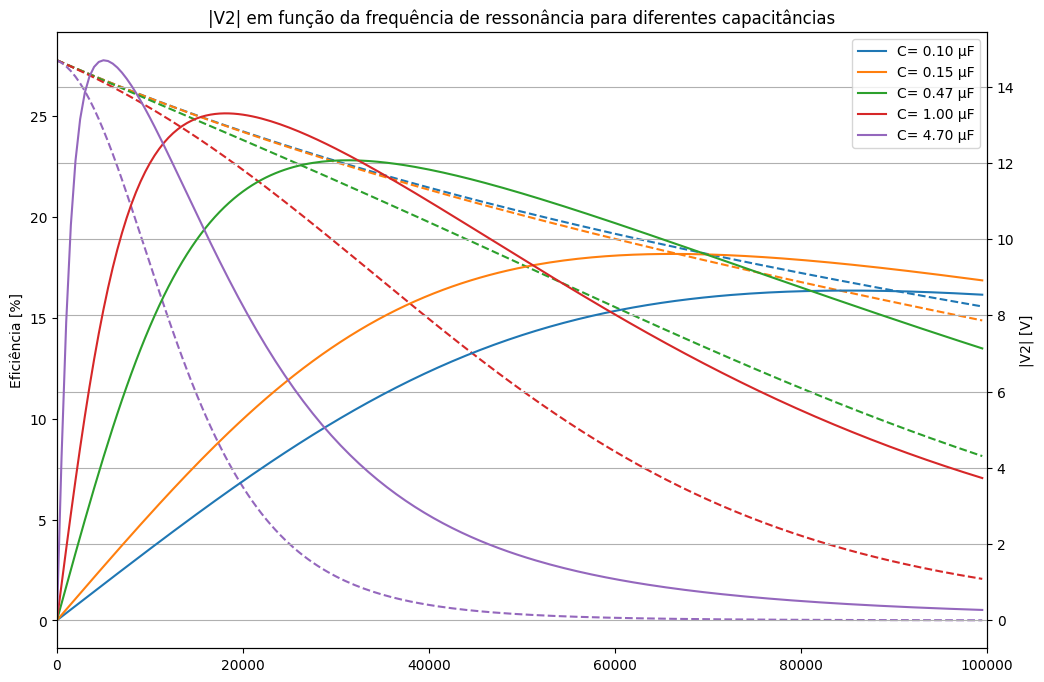

In [136]:
fig, ax1 = plt.subplots(figsize=(12,8))
ax2 = ax1.twinx()


listaC = [0.1e-6, 150e-9, 0.47e-6, 1e-6, 4.7e-6]
listaV2total = []
listaFreqMax = []


for C in listaC:
    C1 = C2 = C
    listaV2 = []
    listaEficiencia = []
    maxV2 = 0
    freqMax = 0

    for f in PossiveisFreq:
        w = 2*math.pi*f
        L1 = L2 = 1/((w**2)*C)
        R1 = R2 = calculaR(f)
        i1, i2, ic , V2 = calculaTransformadorParalelo(kFixo, f)

        listaV2.append(abs(V2))
        if abs(V2) > maxV2:
            maxV2 = abs(V2)
            freqMax = f
        
        eficiencia = (((1/2)*V2*i2.conjugate()).real/((1/2)*Ufonte*i1.conjugate()).real)*100
        listaEficiencia.append(eficiencia)


    listaV2total.append(listaV2)
    listaFreqMax.append(freqMax)

    ax1.plot(PossiveisFreq, listaEficiencia, "--")
    ax2.plot(PossiveisFreq, listaV2, label=f'C= {C*1e6:0.2f} µF')


plt.title("|V2| em função da frequência de ressonância para diferentes capacitâncias")
plt.xlabel("Frequência de ressonância [Hz]")
ax1.set_ylabel("Eficiência [%]")
ax2.set_ylabel("|V2| [V]")
plt.xlim(0,100e3)
plt.grid(True)
plt.legend()
plt.savefig('img/capacitancias.png')
plt.show()

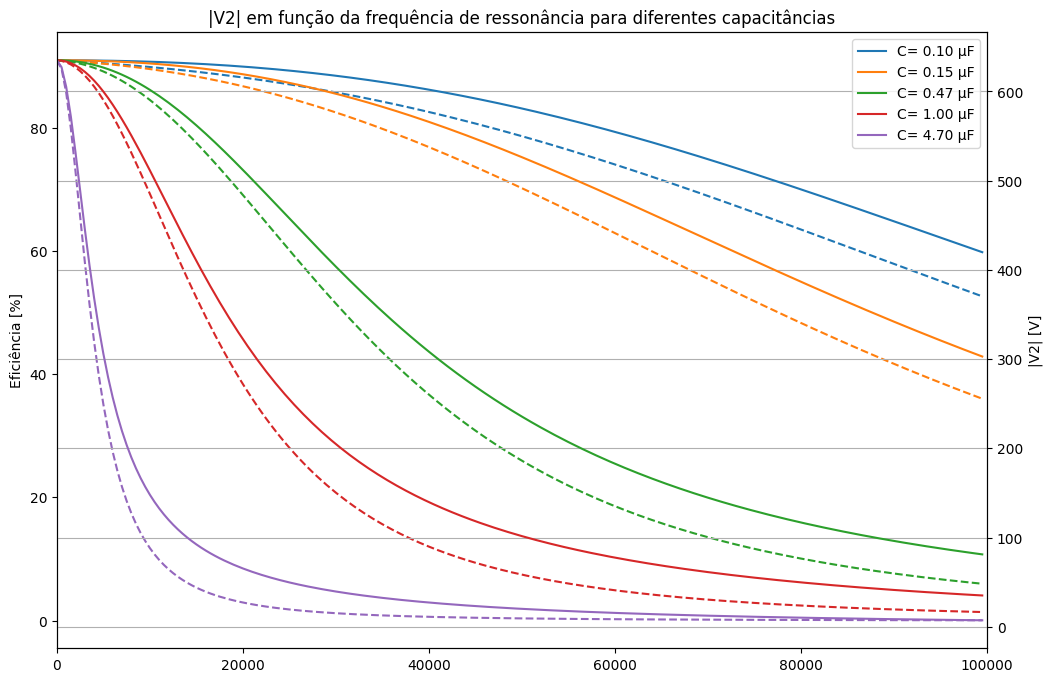

In [131]:
fig, ax1 = plt.subplots(figsize=(12,8))
ax2 = ax1.twinx()


listaC = [0.1e-6, 150e-9, 0.47e-6, 1e-6, 4.7e-6]
listaV2total = []
listaFreqMax = []


for C in listaC:
    C1 = C2 = C
    listaV2 = []
    listaEficiencia = []
    maxV2 = 0
    freqMax = 0

    for f in PossiveisFreq:
        w = 2*math.pi*f
        L1 = L2 = 1/((w**2)*C)
        R1 = R2 = calculaR(f)
        i1, i2, ic , V2 = calculaTransformadorSerie(kFixo, f)

        listaV2.append(abs(V2))
        if abs(V2) > maxV2:
            maxV2 = abs(V2)
            freqMax = f
        
        eficiencia = (((1/2)*V2*i2.conjugate()).real/((1/2)*Ufonte*i1.conjugate()).real)*100
        listaEficiencia.append(eficiencia)


    listaV2total.append(listaV2)
    listaFreqMax.append(freqMax)

    ax1.plot(PossiveisFreq, listaEficiencia, "--")
    ax2.plot(PossiveisFreq, listaV2, label=f'C= {C*1e6:0.2f} µF')


plt.title("|V2| em função da frequência de ressonância para diferentes capacitâncias")
plt.xlabel("Frequência de ressonância [Hz]")
ax1.set_ylabel("Eficiência [%]")
ax2.set_ylabel("|V2| [V]")
plt.xlim(0,100e3)
plt.grid(True)
plt.legend()
plt.savefig('img/capacitancias.png')
plt.show()

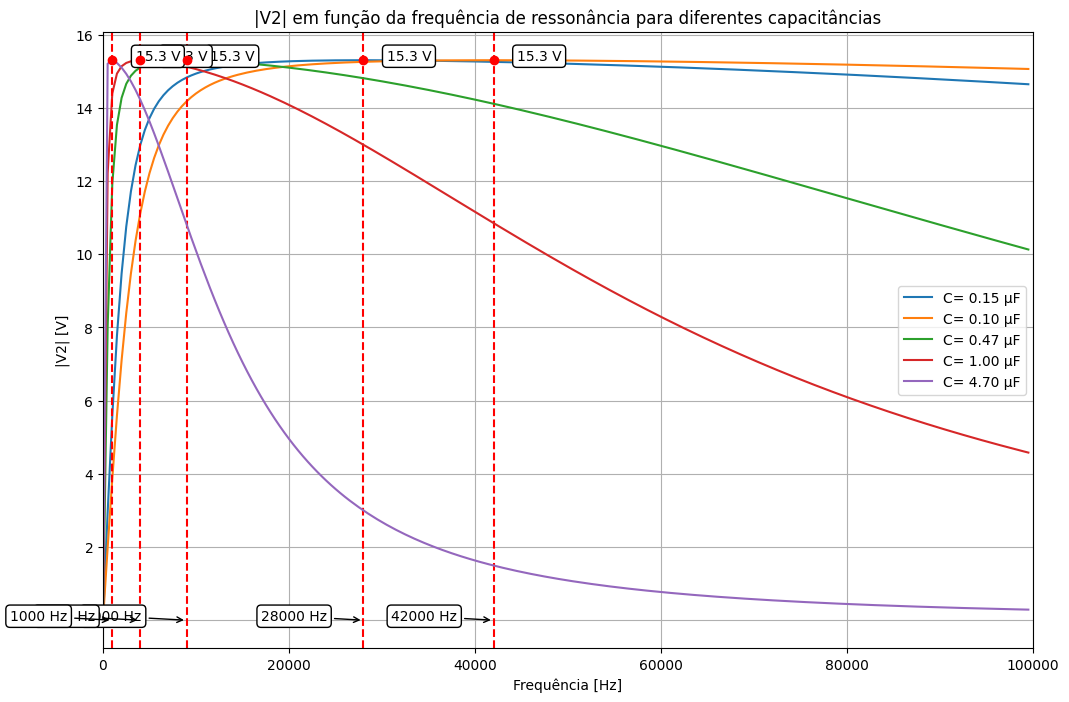

In [32]:
plt.figure(figsize=(12,8))

listaC = [150e-9, 0.1e-6, 0.47e-6, 1e-6, 4.7e-6]
listaV2total = []
listaFreqMax = []


for C in listaC:
    C1 = C2 = C
    listaV2 = []
    maxV2 = 0
    freqMax = 0

    for f in PossiveisFreq:
        w = 2*math.pi*f
        L1 = L2 = 1/((w**2)*C)
        i1, i2, ic , V2 = calculaTransformadorParalelo(kFixo, f)

        listaV2.append(abs(V2))
        if abs(V2) > maxV2:
            maxV2 = abs(V2)
            freqMax = f

    listaV2total.append(listaV2)
    listaFreqMax.append(freqMax)
    
    plt.axvline(x=freqMax, ymin=0, ymax=1, c='r', ls='--')
    plt.annotate(f'{freqMax:.0f} Hz', (freqMax, 0), xytext=(freqMax-11000, 0), bbox=dict(boxstyle='round', fc='w', ec='k', lw=1), arrowprops=dict(arrowstyle='->'))

    plt.scatter(freqMax, maxV2, color='red', zorder=5)
    plt.annotate(f'{round(maxV2, 2)} V', (freqMax, maxV2), xytext=(freqMax+2500, maxV2), bbox=dict(boxstyle='round', fc='w', ec='k', lw=1))

    plt.plot(PossiveisFreq, listaV2, label=f'C= {C*1e6:0.2f} µF')


plt.title("|V2| em função da frequência de ressonância para diferentes capacitâncias")
plt.xlabel("Frequência de ressonância [Hz]")
plt.ylabel("|V2| [V]")
plt.xlim(0,100e3)
plt.grid(True)
plt.legend()
plt.savefig('img/capacitancias.png')
plt.show()